In [1]:
import numpy as np
import growth_simulations as g
import os
import scipy
import time
# import seaborn as sns
import weakref
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
# sns.set_style("whitegrid")

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
def penalty_model(l, x, sigma_l, epsilon, exp):
    num = (1-x)*np.log((1-x)/2)**2+(1+x)*(np.log((1+x)/2))**2
    denom = (1-x)*np.log((1-x)/2)+(1+x)*np.log((1+x)/2)
    penalty = 1-epsilon*x**exp
    return l*penalty*(1-sigma_l**2/(l*penalty)**2*(1+0.5*num/denom))

In [52]:
# # Setting simulation parameters
l = np.array([1.0])
td_std = np.array([0.0])  # 1
lambda_std = np.linspace(0.0, 0.3, num=16)  # 11
delta = np.array([1.0])
beta = np.linspace(0.025, 0.5, num=20)  # 20
r = beta/(1-beta)
x=1-2*beta
alpha = np.linspace(0.0,1.0,11)  # 1
epsilon=np.array([0.0])

num_rep = 100  # number of repeats
# # should give 32000 repeats. Run with 800 job array.
# # should take around 8 hours (480min).49899542
par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 13, 'delta': delta[0], 'lambda': l[0]}
X = [len(td_std), len(lambda_std), len(beta), len(alpha), len(epsilon), num_rep]
i0,i1,i2,i3,i4=0,10,15,10,0
par_vals['td_std']=td_std[i0]
par_vals['lambda_std']=lambda_std[i1]
par_vals['r']=beta[i2]/(1-beta[i2])
par_vals['alpha']=alpha[i3]
par_vals['epsilon']=epsilon[i4]
par_vals['exp_n']=2
print par_vals

{'td_std': 0.0, 'lambda_std': 0.2, 'epsilon': 0.0, 'exp_n': 2, 'v_init': 1.0, 'modeltype': 13, 'r': 0.6666666666666665, 'delta': 1.0, 'alpha': 1.0, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}


Checking the moments

In [54]:
temp=[[],[],[]]
for ind in range(len(beta)):
    par_vals['r']=beta[ind]/(1-beta[ind])
    init_pop = g.starting_popn(par_vals)
    par_vals['nstep']=500  # seeding the population with a simulated one
    c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
    init_pop = g.starting_popn_seeded(c, par_vals)
    par_vals['nstep']=900  # seeding the population with a simulated one
    c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)    
    xv = [obj.vb for obj in c if obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
    temp[0].append(np.mean(xv))
    temp[1].append(np.std(xv)**2)
    temp[2].append(np.mean((xv-np.mean(xv))**3))

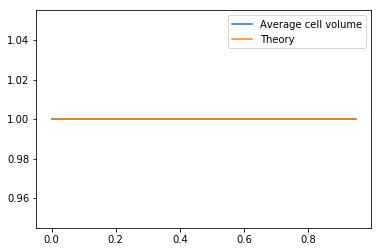

In [57]:
plt.plot(1-2*beta,temp[0],label='Average cell volume')
plt.plot(1-2*beta,par_vals['delta']*np.ones(len(beta)),label='Theory')
plt.legend()

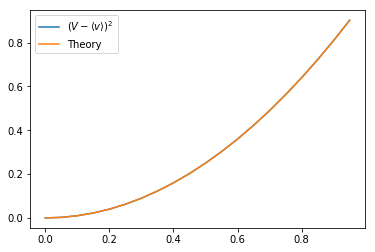

In [60]:
plt.plot(1-2*beta,temp[1],label=r'$(V-\langle v\rangle)^2$')
plt.plot(1-2*beta,v_2nd_mom(par_vals['delta'],1-2*beta,par_vals['alpha']),label='Theory')
plt.legend()

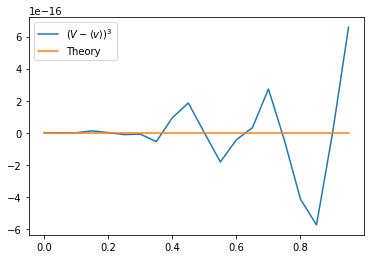

In [64]:
plt.plot(1-2*beta,temp[2],label=r'$(V-\langle v\rangle)^3$')
plt.plot(1-2*beta,v_3rd_mom(par_vals['delta'],1-2*beta,par_vals['alpha']),label='Theory')
plt.legend()

In [41]:
i2=0
par_vals['r']=beta[i2]/(1-beta[i2])
par_vals['alpha']
init_pop = g.starting_popn(par_vals)
par_vals['nstep']=500  # seeding the population with a simulated one
c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
init_pop = g.starting_popn_seeded(c, par_vals)
par_vals['nstep']=900  # seeding the population with a simulated one
c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)    

In [42]:
print par_vals
xv = [obj.vb for obj in c if obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
print np.mean(xv)
print np.std(xv)**2
print np.mean((xv-np.mean(xv))**3)

{'td_std': 0.0, 'lambda_std': 0.2, 'epsilon': 0.0, 'exp_n': 2, 'v_init': 1.0, 'modeltype': 13, 'r': 0.025641025641025644, 'delta': 1.0, 'alpha': 1.0, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}
0.9999999999999999
0.9025
5.014111371522774e-16


The values line up nicely for $\alpha=1$, but recall that this is the IGT case.

In [29]:
temp=[[],[],[]]
for ind in range(len(beta)):
    par_vals['r']=beta[ind]/(1-beta[ind])
    init_pop = g.starting_popn(par_vals)
    par_vals['nstep']=500  # seeding the population with a simulated one
    c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
    init_pop = g.starting_popn_seeded(c, par_vals)
    par_vals['nstep']=900  # seeding the population with a simulated one
    c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)    
    xv = [obj.vb for obj in c if obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
    temp[0].append(np.mean(xv))
    temp[1].append(np.std(xv)**2)
    temp[2].append(np.mean((xv-np.mean(xv))**3))

In [47]:
par_vals={'td_std': 0.0, 'lambda_std': 0.2, 'epsilon': 0.0, 'exp_n': 2, 'v_init': 1.0, 'modeltype': 13, 'r': 1.0, 'delta': 1.0, 'alpha': 0.8, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}

In [30]:
print par_vals

{'td_std': 0.0, 'lambda_std': 0.2, 'epsilon': 0.0, 'exp_n': 2, 'v_init': 1.0, 'modeltype': 13, 'r': 1.0, 'delta': 1.0, 'alpha': 0.8, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}


In [53]:
temp2=temp

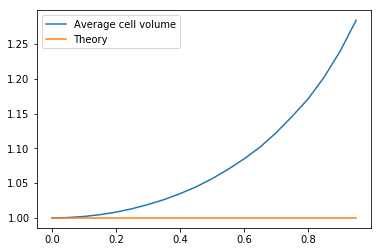

In [32]:
plt.plot(1-2*beta,temp[0],label='Average cell volume')
plt.plot(1-2*beta,par_vals['delta']*np.ones(len(beta)),label='Theory')
plt.legend()

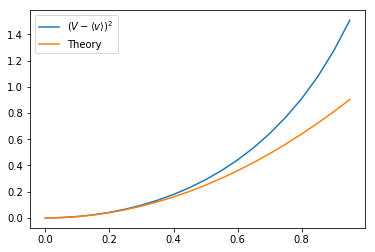

In [66]:
plt.plot(1-2*beta,temp2[1],label=r'$(V-\langle v\rangle)^2$')
plt.plot(1-2*beta,v_2nd_mom(par_vals['delta'],1-2*beta,par_vals['alpha']),label='Theory')
plt.legend()

In [69]:
par_vals={'td_std': 0.0, 'lambda_std': 0.2, 'epsilon': 0.0, 'exp_n': 2, 'v_init': 1.0, 'modeltype': 13, 'r': 1.0, 'delta': 1.0, 'alpha': 0.8, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}

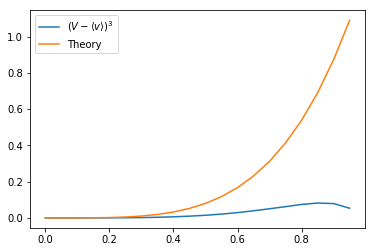

In [70]:
plt.plot(1-2*beta,temp2[2],label=r'$(V-\langle v\rangle)^3$')
plt.plot(1-2*beta,v_3rd_mom_v2(par_vals['delta'],1-2*beta,par_vals['alpha']),label='Theory')
plt.legend()

In [65]:
def v_2nd_mom(temp_delta,temp_x,temp_alpha):
    num=temp_delta**2*temp_x**2
    denom=1-(1-temp_alpha)**2*(1+temp_x**2)
    return num/denom
def v_3rd_mom(temp_delta,temp_x,temp_alpha):
    num=24*temp_delta**3*temp_x**4*(1-temp_alpha)**2
    denom=(1-(1-temp_alpha)**2*(1+temp_x**2))*(1-(1-temp_alpha)**3*(1+3*temp_x**2))
    return num/denom
def v_3rd_mom_v2(temp_delta,temp_x,temp_alpha):
    num=6*temp_delta**3*temp_x**4*(1-temp_alpha)
    denom=(1-(1-temp_alpha)**2*(1+temp_x**2))*(1-(1-temp_alpha)**3*(1+3*temp_x**2))
    return num/denom

In [44]:
print v_3rd_mom(1.0,0.5,0.8)
print v_3rd_mom_v2(1.0,0.5,0.8)

0.0640546599765
0.166809010356


In [25]:
print par_vals

{'td_std': 0.0, 'lambda_std': 0.1, 'epsilon': 0.0, 'exp_n': 2, 'v_init': 1.0, 'modeltype': 13, 'r': 1.0, 'delta': 1.0, 'alpha': 0.5, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}


In [26]:
temp1 = temp  # storing this so it doesn't get overwritten

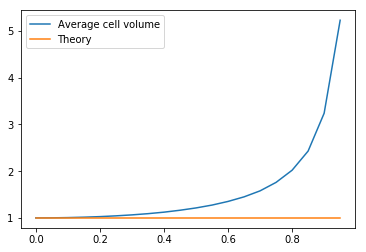

In [21]:
plt.plot(1-2*beta,temp1[0],label='Average cell volume')
plt.plot(1-2*beta,par_vals['delta']*np.ones(len(beta)),label='Theory')
plt.legend()

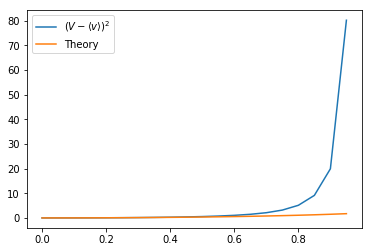

In [22]:
plt.plot(1-2*beta,temp1[1],label=r'$(V-\langle v\rangle)^2$')
plt.plot(1-2*beta,v_2nd_mom(par_vals['delta'],1-2*beta,par_vals['alpha']),label='Theory')
plt.legend()

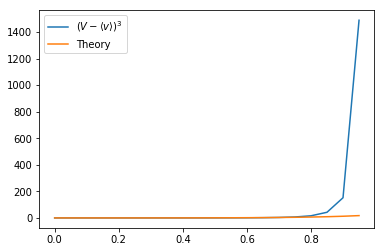

In [23]:
plt.plot(1-2*beta,temp1[2],label=r'$(V-\langle v\rangle)^3$')
plt.plot(1-2*beta,v_3rd_mom(par_vals['delta'],1-2*beta,par_vals['alpha']),label='Theory')
plt.legend()

In [15]:
xv = [obj.vb for obj in c if obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
print np.std(xv)**2, v_2nd_mom(par_vals['delta'], 1-2*par_vals['r']/(1+par_vals['r']),par_vals['alpha'])
print np.mean((xv-np.mean(xv))**3), v_3rd_mom(par_vals['delta'], 1-2*par_vals['r']/(1+par_vals['r']),par_vals['alpha'])

0.05721924427909226 0.05405405405405409
0.003823910381187276 0.01508485229415464


In [ ]:
# # Setting simulation parameters
l = np.array([1.0])
td_std = np.array([0.0])  # 1
lambda_std = np.linspace(0.0, 0.3, num=16)  # 11
delta = np.array([1.0])
beta = np.linspace(0.025, 0.5, num=20)  # 20
r = beta/(1-beta)
x=1-2*beta
alpha = np.linspace(0.0,1.0,11)  # 1
epsilon=np.array([0.0])

num_rep = 100  # number of repeats
# # should give 32000 repeats. Run with 800 job array.
# # should take around 8 hours (480min).49899542
par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 13, 'delta': delta[0], 'lambda': l[0]}
X = [len(td_std), len(lambda_std), len(beta), len(alpha), len(epsilon), num_rep]
i0,i1,i2,i3,i4=0,5,11,10,0
par_vals['td_std']=td_std[i0]
par_vals['lambda_std']=lambda_std[i1]
par_vals['r']=beta[i2]/(1-beta[i2])
par_vals['alpha']=alpha[i3]
par_vals['epsilon']=epsilon[i4]
par_vals['exp_n']=2

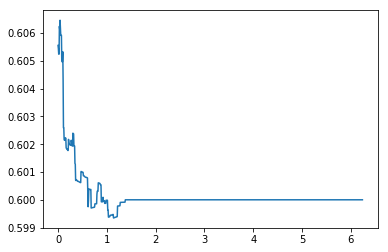

In [21]:
init_pop = g.starting_popn(par_vals)
par_vals['nstep']=900  # seeding the population with a simulated one
c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
plt.plot(obs[1],obs[9][1])

Checking that the calculated form for $m=x$ is accurate for asymmetrically dividing sizer cells

In [22]:
xv=[obj for obj in c if obj.exists and obj.celltype == 1]
yv=[obj for obj in c if obj.exists and obj.celltype == 0]
print (len(xv)-len(yv))*1.0/(len(xv)+len(yv))*1.0
print par_vals
print 1-2*par_vals['r']/(1+par_vals['r'])

0.397664370369
{'td_std': 0.0, 'lambda_std': 0.1, 'epsilon': 0.0, 'exp_n': 2, 'v_init': 1.0, 'modeltype': 13, 'r': 0.4285714285714286, 'delta': 1.0, 'alpha': 1.0, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}
0.4


In [7]:
tic=time.clock()
init_pop = g.starting_popn(par_vals)
obs_cum = [[],[]]
par_vals['nstep']=500  # seeding the population with a simulated one
c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
init_pop = g.starting_popn_seeded(c, par_vals)
obs_cum[0]=obs[9][0]
obs_cum[1]=obs[9][1]
for ind in range(3):
    par_vals['nstep']=900  # seeding the population with a simulated one
    c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
    init_pop = g.starting_popn_seeded(c, par_vals)
    obs_cum[0]=np.concatenate((obs_cum[0],obs[9][0]),axis=0)
    obs_cum[1]=np.concatenate((obs_cum[1],obs[9][1]),axis=0)
    print 'Done {0} repeats, Time taken ={1}s'.format(ind, np.around(time.clock()-tic,2))

Done 0 repeats, Time taken =94.81s
Done 1 repeats, Time taken =205.27s
Done 2 repeats, Time taken =312.14s


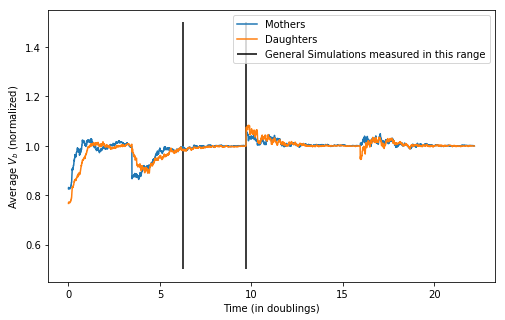

In [9]:
fig=plt.figure(figsize=[8,5])
x=np.arange(0,len(obs_cum[0]))*par_vals['dt'] * np.log(2)/par_vals['lambda']
plt.plot(x,obs_cum[0]/obs_cum[0][-1],label='Mothers')
plt.plot(x, obs_cum[1]/obs_cum[1][-1],label='Daughters')
plt.vlines(x=900 * np.log(2)/par_vals['lambda']*par_vals['dt'],ymin=0.5,ymax=1.5,label='General Simulations measured in this range')
plt.vlines(x=1400 * np.log(2)/par_vals['lambda']*par_vals['dt'],ymin=0.5,ymax=1.5,color='k')
plt.legend()
plt.ylabel('Average $V_b$ (normalized)')
plt.xlabel('Time (in doublings)')
fig.savefig('/mnt/c/Users/felix/Dropbox/19_growth_rate_paper/Figures/Simulation_convergence_beta_02.png',dpi=300,bbox_inches='tight')